In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col=0)

Here I am looking at whether any added variables can affect the child's test scores.\ I should also do this with their wellbeing test scores.
## add to 5.21

## Parent level of education

In [3]:
pivot_parentlevelofedu = df.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH15A','ASBH15B'] )

In [4]:
pivot_parentlevelofedu

ASBH15A                     1.0                                      \
ASBH15B                     1.0         2.0         3.0         4.0   
Country     ASBH02A                                                   
Austria     No       435.659564         NaN         NaN  528.195355   
            Yes      420.646031         NaN         NaN  408.735574   
Egypt       No       404.327629  296.456540         NaN  482.771890   
            Yes      343.547233  332.637388  341.394762  349.928624   
France      No       498.387656         NaN  368.374409         NaN   
            Yes      505.283577  591.382984         NaN  489.685435   
Jordan      No       336.795693  353.869954  411.155682  303.974172   
            Yes      299.282079  320.698007  319.931453  350.161576   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes      525.952762         NaN         NaN         NaN   
Sweden      No       498.779777         NaN         NaN         NaN   
            Yes      475.466987         NaN         NaN  560.624655   

ASBH15A                                                              \
ASBH15B                     5.0         6.0         7.0         9.0   
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Egypt       No              NaN         NaN  372.002924         NaN   
            Yes      362.071663  275.321025         NaN  317.194583   
France      No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  442.321528         NaN   
Jordan      No       468.744458         NaN  261.597630  370.530445   
            Yes      380.395070  362.018027  347.698645  334.524347   
Netherlands No              NaN  497.568294         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Sweden      No              NaN         NaN         NaN  349.611278   
            Yes             NaN         NaN         NaN         NaN   

ASBH15A                     2.0                                      \
ASBH15B                     1.0         2.0         3.0         4.0   
Country     ASBH02A                                                   
Austria     No              NaN  484.186130  472.363134  389.176339   
            Yes      591.224610  491.087455  474.696791  465.956626   
Egypt       No              NaN         NaN         NaN  455.213302   
            Yes      340.340349  359.251851  355.051628  364.825985   
France      No       415.984152  482.578884  543.540855  554.655328   
            Yes      465.053132  475.471547  559.233620  486.634570   
Jordan      No       356.527073  345.672318  350.577212  313.215371   
            Yes      289.773675  308.076817  326.277388  307.070362   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes             NaN  462.156375  452.698908  510.969313   
Sweden      No       594.196354  493.267757  505.379508  422.794839   
            Yes      577.202528  518.817013  575.314595  525.695819   

ASBH15A                                                              \
ASBH15B                     5.0         6.0         7.0         8.0   
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
            Yes      542.575546  594.325635  441.959557         NaN   
Egypt       No       347.536216  343.340501         NaN         NaN   
            Yes      304.838652  336.854821  514.854116         NaN   
France      No              NaN  543.676189         NaN  444.545003   
            Yes             NaN  510.463941         NaN  426.515223   
Jordan      No       293.284828  481.762655  418.547075         NaN   
            Yes      318.749128  405.056936  397.888121         NaN   
Netherlands No       

These double pivot tables with two columns are not very helpful when those columns have multiple options.

let's look at the columns that all countries have answers for - 02B - age when arrived in country and 3a speaking lang of test before school? check this!

# lang of test

In [5]:
pivot_langoftest = df.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH03A'] )

In [6]:
pivot_langoftest

ASBH03A                      No         Yes
Country     ASBH02A                        
Austria     No       487.644450  519.200136
            Yes      472.403527  540.354807
Egypt       No       381.043511  372.595149
            Yes      375.918329  381.073185
France      No       488.363427  502.055537
            Yes      485.858645  523.752310
Germany     No       484.695156  515.642813
            Yes      516.033362  547.088453
Iran        No       422.337225  429.608856
            Yes      360.918244  433.432464
Jordan      No       341.963226  383.829266
            Yes      343.067021  368.516474
Netherlands No       492.096739  558.039226
            Yes      523.447747  545.748518
Sweden      No       486.508932  534.645708
            Yes      520.077984  567.317763
Turkey      No       440.874842  474.730634
            Yes      473.134352  509.609453

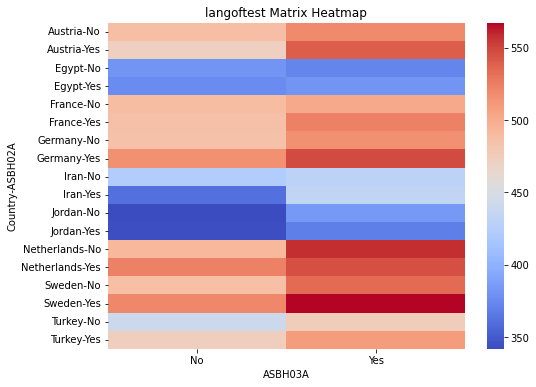

In [7]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_langoftest, annot=False, cmap='coolwarm')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

Again I want to put the yesses on top of the nos. And do I want to arange the order?

Let's do a pivot adding the lang of test column to the index. 

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [8]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38671
0.0     1110
3.0      852
6.0      483
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [9]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [10]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38671
 0.0     1110
 3.0      852
 6.0      483
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [11]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [12]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,535.931404,524.691549,503.023525,482.467533,472.698753
Egypt,380.234984,382.087467,360.526565,353.167965,359.496124
France,522.219901,514.789067,500.251059,487.735549,449.952812
Germany,546.167948,513.748950,489.432386,491.374898,495.923077
Iran,422.308155,413.120203,437.669405,450.368901,429.309478
Jordan,368.776349,380.605999,385.670465,381.076742,372.786823
Netherlands,544.917812,546.704431,510.434272,532.347393,529.268667
Sweden,565.960709,547.588860,506.832225,496.426190,486.933911
Turkey,507.204903,461.440636,438.160717,469.426985,446.103548


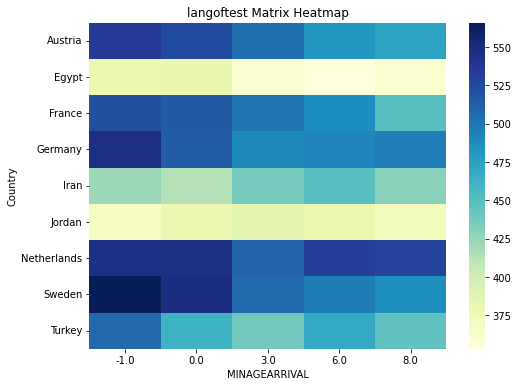

In [13]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_minage, annot=False, cmap='YlGnBu')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

would expect -1.0 to be the darkest

I want to rearrange this heat map in a sorted way so that it is easier to read.

In [14]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

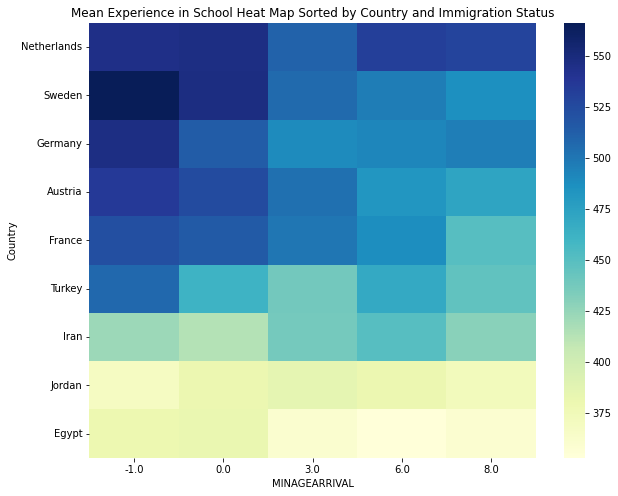

In [16]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

Rearrange order of columns -put asdage with other demographic    
 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant